# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [4]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
# Create a new dataframe from your CSV
df= pd.read_csv('Rat_Sightings.csv')

In [7]:
# Print out any information you need to understand your dataframe
print(df.shape)
print(df.dtypes)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(101914, 52)
Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                     float64
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough              

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

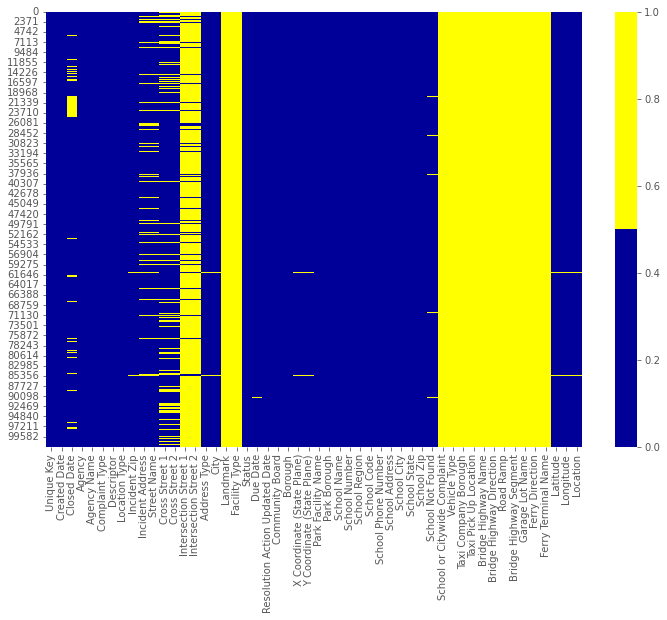

In [11]:
# Plot a heatmap of any missing data
cols = df.columns
colors = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colors))

In [14]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unique Key - 0%
Created Date - 0%
Closed Date - 11%
Agency - 0%
Agency Name - 0%
Complaint Type - 0%
Descriptor - 0%
Location Type - 0%
Incident Zip - 0%
Incident Address - 9%
Street Name - 9%
Cross Street 1 - 16%
Cross Street 2 - 16%
Intersection Street 1 - 91%
Intersection Street 2 - 91%
Address Type - 0%
City - 0%
Landmark - 100%
Facility Type - 100%
Status - 0%
Due Date - 0%
Resolution Action Updated Date - 0%
Community Board - 0%
Borough - 0%
X Coordinate (State Plane) - 1%
Y Coordinate (State Plane) - 1%
Park Facility Name - 0%
Park Borough - 0%
School Name - 0%
School Number - 0%
School Region - 0%
School Code - 0%
School Phone Number - 0%
School Address - 0%
School City - 0%
School State - 0%
School Zip - 0%
School Not Found - 1%
School or Citywide Complaint - 100%
Vehicle Type - 100%
Taxi Company Borough - 100%
Taxi Pick Up Location - 100%
Bridge Highway Name - 100%
Bridge Highway Direction - 100%
Road Ramp - 100%
Bridge Highway Segment - 100%
Garage Lot Name - 100%
Ferry Dire

In [22]:
# Plot a missing data histogram
# for col in df.columns:
#     missing = df[col].isnull()
#     num_missing = np.sum(missing)
#     if num_missing > 0:
#             print('Created missing indicator for: {}'.format(col))
#             df['{}_ismissing'.format(col)] = missing
            
# ismissiismissing_cols = [col for col in df.columns if 'ismissing' in col]
# df['num_missing'] = df[ismissing_cols].sum(axis=1)
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

created missing indicator for: Closed Date
created missing indicator for: Location Type
created missing indicator for: Incident Zip
created missing indicator for: Incident Address
created missing indicator for: Street Name
created missing indicator for: Cross Street 1
created missing indicator for: Cross Street 2
created missing indicator for: Intersection Street 1
created missing indicator for: Intersection Street 2
created missing indicator for: Address Type
created missing indicator for: City
created missing indicator for: Landmark
created missing indicator for: Facility Type
created missing indicator for: Due Date
created missing indicator for: Resolution Action Updated Date
created missing indicator for: X Coordinate (State Plane)
created missing indicator for: Y Coordinate (State Plane)
created missing indicator for: School Not Found
created missing indicator for: School or Citywide Complaint
created missing indicator for: Vehicle Type
created missing indicator for: Taxi Company 

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [27]:
# Handle any missing data in your dataframe.
cols_to_drop = ['School or Citywide Complaint',
'Vehicle Type',
'Taxi Company Borough',
'Taxi Pick Up Location',
'Bridge Highway Name',
'Bridge Highway Direction', 
'Road Ramp',
'Bridge Highway Segment',
'Garage Lot Name',
'Ferry Direction',
'Ferry Terminal Name','Intersection Street 1',
'Intersection Street 2']
df_less_dropped_cols = df.drop(cols_to_drop,axis=1)

In [30]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)



## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

array([[<AxesSubplot:title={'center':'Unique Key'}>,
        <AxesSubplot:title={'center':'Incident Zip'}>,
        <AxesSubplot:title={'center':'Facility Type'}>,
        <AxesSubplot:title={'center':'X Coordinate (State Plane)'}>],
       [<AxesSubplot:title={'center':'Y Coordinate (State Plane)'}>,
        <AxesSubplot:title={'center':'School or Citywide Complaint'}>,
        <AxesSubplot:title={'center':'Vehicle Type'}>,
        <AxesSubplot:title={'center':'Taxi Company Borough'}>],
       [<AxesSubplot:title={'center':'Taxi Pick Up Location'}>,
        <AxesSubplot:title={'center':'Bridge Highway Name'}>,
        <AxesSubplot:title={'center':'Bridge Highway Direction'}>,
        <AxesSubplot:title={'center':'Road Ramp'}>],
       [<AxesSubplot:title={'center':'Bridge Highway Segment'}>,
        <AxesSubplot:title={'center':'Garage Lot Name'}>,
        <AxesSubplot:title={'center':'Ferry Direction'}>,
        <AxesSubplot:title={'center':'Ferry Terminal Name'}>],
       [<AxesSubp

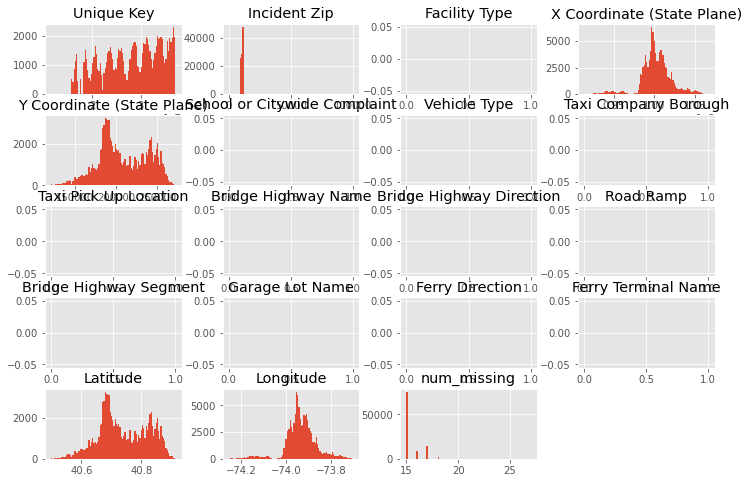

In [31]:
# Plot a histogram to see if there are any outliers.
df.hist(bins=100)

In [32]:
# Use the describe() method
df.describe()

,Unique Key,Incident Zip,Facility Type,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,num_missing
count,1.019140e+05,101578.000000,0.0,1.012080e+05,101208.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101208.000000,101208.000000,101914.000000
mean,2.815864e+07,10728.680895,NaN,1.002473e+06,208639.988953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739304,-73.934206,15.491974
std,6.015376e+06,631.206648,NaN,1.958043e+04,29956.193531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082224,0.070617,0.996092
min,1.146439e+07,83.000000,NaN,9.134950e+05,121350.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499502,-74.254437,15.000000
25%,2.341452e+07,10086.250000,NaN,9.936100e+05,186934.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679740,-73.966216,15.000000
50%,2.883680e+07,10472.000000,NaN,1.001398e+06,203425.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725009,-73.938112,15.000000
75%,3.346014e+07,11222.000000,NaN,1.011951e+06,236364.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.815428,-73.899963,16.000000
max,3.719700e+07,100354.000000,NaN,1.066922e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.912869,-73.701632,27.000000


<AxesSubplot:>

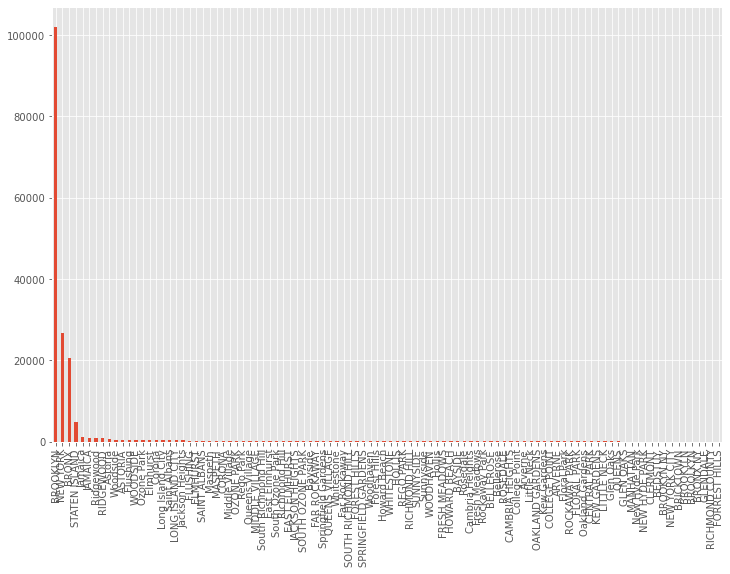

In [39]:
# Plot a bar chart
df['Complaint Type'].value_counts().plot.bar()
df['City'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [41]:
# Look for any irrelevant data in the dataframe. How will you handle it?


In [42]:
# Look for duplicates. How will you handle any duplicates?
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Agency: 100.00000%
DOHMH    101914
Name: Agency, dtype: int64

Agency Name: 100.00000%
Department of Health and Mental Hygiene    101914
Name: Agency Name, dtype: int64

Complaint Type: 100.00000%
Rodent    101914
Name: Complaint Type, dtype: int64

Descriptor: 100.00000%
Rat Sighting    101914
Name: Descriptor, dtype: int64

Landmark: 99.97154%
J F K AIRPORT                      101885
GRAND ARMY PLAZA                        3
WOODHULL MEDICAL CENTER                 3
BARCLAYS CENTER                         2
LA GUARDIA AIRPORT                      2
METROPOLITAN MUSEUM                     2
HUNTER COLLEGE                          2
PENNSYLVANIA STATION                    2
BRYANT PARK                             1
WORLDS FAIR MARINA                      1
LEHMAN COLLEGE                          1
FERRY TERMINAL                          1
BROOKLYN MUSEUM                         1
CITY HALL                               1
BKLYN BATTERY TUNNEL                    1
BKLYN PUBLIC LIBRARY  

In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [51]:
# Try to convert all the strings in a column to lower or upper case. 
df['City_lower'] = df['City'].str.lower()
df['City_lower'].value_counts(dropna=False)

brooklyn               34899
new york               26666
bronx                  20656
staten island           4894
jamaica                 2195
ridgewood               1615
astoria                 1068
woodside                 786
flushing                 632
long island city         560
elmhurst                 529
corona                   506
ozone park               506
saint albans             491
jackson heights          416
maspeth                  415
middle village           377
east elmhurst            323
queens village           319
south ozone park         314
south richmond hill      292
far rockaway             279
rego park                275
springfield gardens      264
richmond hill            258
whitestone               243
forest hills             226
bayside                  213
woodhaven                192
sunnyside                186
hollis                   180
howard beach             170
fresh meadows            126
rosedale                 107
cambria height